## Deep Learning: Linear Regression

In this project, we shall generate a dataset for simple linear regression, comprising 1000 data points and three features. We will achieve this using the `make_regression` function from the `sklearn.datasets` module.

### 1. Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

data = make_regression(n_samples=1000, n_features=3, noise=5, random_state=42)

In [2]:
print('Number of data points: {}'.format(data[0].shape[0]))
print('Number of data features: {}'.format(data[0].shape[1]))

Number of data points: 1000
Number of data features: 3


In [3]:
# convert data to pandas dataframe
df = pd.DataFrame()
df['x1'] = data[0][:, 0]
df['x2'] = data[0][:, 1]
df['x3'] = data[0][:, 2]
df['y'] = data[1]

# show first five rows of dataframe
df.head()

,x1,x2,x3,y
0,-0.189120,-1.330314,0.921650,-99.884788
1,-0.653329,-0.474945,1.765454,-58.794289
2,-0.224856,0.076852,-0.650003,-30.448139
3,0.570599,-0.662624,-0.763259,-15.323122
4,0.327880,-0.125454,0.085893,17.961125


In [4]:
# save dataframe as csv file
df.to_csv('lr.csv', index=False)

### 2. Deep Learning: Linear Regression

To begin, we will import the required modules.

In [5]:
import torch
from torch import nn
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Next, we will create a dataset class

In [6]:
class LRDataset(Dataset):
    def __init__(self, csv_file):
        file = pd.read_csv(csv_file)
        self.x = file.iloc[:, :-1]
        self.y = np.array(file.iloc[:, -1])
        
        # scaling
        self.scaler = StandardScaler()
        self.features = self.scaler.fit_transform(self.x)
        self.label = self.scaler.fit_transform(self.y.reshape(-1, 1))

        # transform to torch tensor
        self.X_train = torch.tensor(self.features, dtype=torch.float32)
        self.y_train = torch.tensor(self.label, dtype=torch.float32)
    
    def __len__(self):
        return len(self.y_train)
    
    def __getitem__(self, idx):
        return self.X_train[idx], self.y_train[idx]

We'll use the CSV file we created in the first section.

In [7]:
# pass the csv file
features = LRDataset('lr.csv')

# Data loader
train_loader = DataLoader(features, batch_size=10, shuffle=True)

Next, we will construct a linear regression class. Linear regression is constructed using a single linear layer.

In [8]:
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super(Net, self).__init__()
        self.layer = torch.nn.Linear(input_size, output_size)
        
    def forward(self, x):
        out = self.layer(x)
        return out
    

input_size = features.X_train.shape[1]
output_size = 1

# define the model
model = Net(input_size, output_size)

# define the loss function and optimizer
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)    

Lastly, we will create the training loop.

In [9]:
epochs = 50

# Lists to store loss values for plotting
training_losses = []

print("Training started...")
for i in range(epochs):
    running_loss = 0
    total_samples = 0
    total_mse = 0
    
    for features, labels in train_loader:
        
        # forward pass
        output = model(features)
        loss = loss_func(output, labels.view(-1, 1))
        
        optimizer.zero_grad() # clear previous gradients
        loss.backward() # backward pass
        optimizer.step()
        
        running_loss += loss.item()
        total_samples += labels.size(0)
        total_mse += loss.item() * labels.size(0)
    
    mse = total_mse / total_samples  # Calculate mse

    training_losses.append(mse)  # Store training loss for plotting
    
    if (i + 1) % 5 == 0:  # Print for each 5 epochs
        print(f"Epoch {i + 1}/{epochs} - Loss: {running_loss:.4f} - MSE: {mse:.4f}")

print("Training completed.")


Training started...
Epoch 5/50 - Loss: 8.3323 - MSE: 0.0833
Epoch 10/50 - Loss: 1.3218 - MSE: 0.0132
Epoch 15/50 - Loss: 0.3195 - MSE: 0.0032
Epoch 20/50 - Loss: 0.1752 - MSE: 0.0018
Epoch 25/50 - Loss: 0.1543 - MSE: 0.0015
Epoch 30/50 - Loss: 0.1513 - MSE: 0.0015
Epoch 35/50 - Loss: 0.1509 - MSE: 0.0015
Epoch 40/50 - Loss: 0.1508 - MSE: 0.0015
Epoch 45/50 - Loss: 0.1508 - MSE: 0.0015
Epoch 50/50 - Loss: 0.1508 - MSE: 0.0015
Training completed.


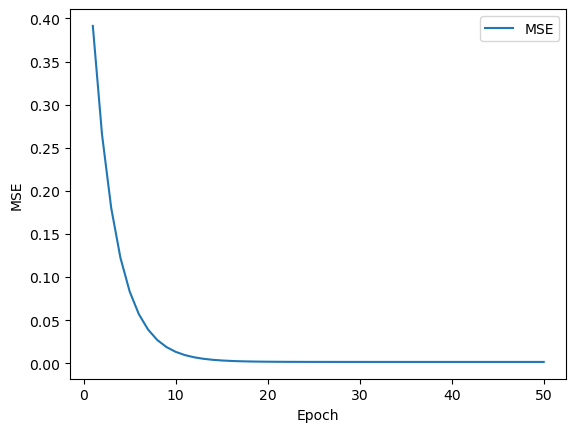

In [10]:
# Final loss curve plot (only once)
plt.plot(range(1, epochs + 1), training_losses, label='MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()
